     sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


Average Accuracy Linear: 	 0.9500
Accuracy SD Linear: 		 0.0553
Precision Score Linear: 	 0.9500
Recall Score Linear: 		 0.9500
F1 Score Linear: 		 0.9500
Average Accuracy Polynomial: 	 0.9500
Accuracy SD Polynomial: 		 0.0764
Precision Score Polynomial: 	 0.9570
Recall Score Polynomial: 		 0.9500
F1 Score Polynomial: 		 0.9500
Average Accuracy sig: 	 0.9500
Accuracy SD sig: 		 0.0553


array([[39,  0,  0],
       [ 0, 32,  5],
       [ 0,  1, 43]])

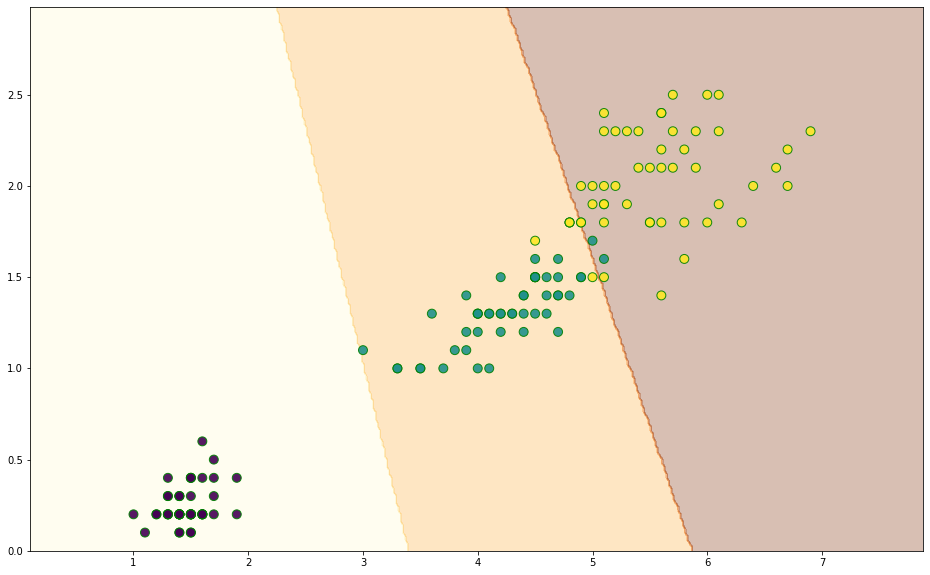

In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets
from sklearn import svm
import matplotlib.pyplot as plt
df = sns.load_dataset('iris')
print(df)
df.head()
df.species.unique()
col = ['petal_length', 'petal_width']
X = df.loc[:, col]
species_to_num = {'setosa': 0,
'versicolor': 1,
'virginica': 2}
df['tmp'] = df['species'].map(species_to_num)
y = df['tmp']
clf = svm.SVC(kernel='linear', C=0.001)
clf.fit(X, y)
Xv = X.values.reshape(-1, 1)
h = 0.02
x_min, x_max = Xv.min(), Xv.max() + 1
y_min, y_max = y.min(), y.max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
np.arange(y_min, y_max, h))
z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)
fig = plt.figure(figsize=(16, 10))
ax = plt.contourf(xx, yy, z, cmap = 'YlOrBr', alpha=0.3);
plt.scatter(X.values[:, 0], X.values[:, 1], c=y, s=80,
alpha=0.9, edgecolors='g');

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(X, y,
train_size=0.8, random_state=0)
sc_x = StandardScaler()
X_std_train = sc_x.fit_transform(X_train)
clf = svm.SVC(kernel = 'linear', C=1)
clf.fit(X_std_train, y_train)


from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score

res = cross_val_score(clf, X_std_train, y_train, cv=10, scoring ='accuracy')
print("Average Accuracy Linear: \t {0:.4f}".format(np.mean(res)))
print("Accuracy SD Linear: \t\t {0:.4f}".format(np.std(res)))

y_train_pred = cross_val_predict(clf, X_std_train, y_train, cv=3)
confusion_matrix(y_train, y_train_pred)
print("Precision Score Linear: \t {0:.4f}".format(precision_score(y_train, y_train_pred,average='weighted')))
print("Recall Score Linear: \t\t {0:.4f}".format(recall_score(y_train,y_train_pred,average='weighted')))
print("F1 Score Linear: \t\t {0:.4f}".format(f1_score(y_train,y_train_pred,average='weighted')))

clf_poly = svm.SVC(kernel = 'poly', C=0.8)
clf_poly.fit(X_std_train, y_train)
res_poly = cross_val_score(clf_poly, X_std_train, y_train, cv=10,scoring = 'accuracy')
print("Average Accuracy Polynomial: \t {0:.4f}".format(np.mean(res_poly)))
print("Accuracy SD Polynomial: \t\t {0:.4f}".format(np.std(res_poly)))

y_train_pred_poly = cross_val_predict(clf_poly, X_std_train,y_train, cv=3)
confusion_matrix(y_train, y_train_pred_poly)
print("Precision Score Polynomial: \t {0:.4f}".format(precision_score(y_train,y_train_pred_poly,average='weighted')))
print("Recall Score Polynomial: \t\t {0:.4f}".format(recall_score(y_train,y_train_pred_poly,average='weighted')))
print("F1 Score Polynomial: \t\t {0:.4f}".format(f1_score(y_train, y_train_pred_poly, average='weighted')))

clf_sig = svm.SVC(kernel = 'sigmoid', C=1)
clf_sig.fit(X_std_train, y_train)
res_sig = cross_val_score(clf_sig, X_std_train, y_train, cv=10,scoring= 'accuracy')
print("Average Accuracy sig: \t {0:.4f}".format(np.mean(res)))
print("Accuracy SD sig: \t\t {0:.4f}".format(np.std(res)))

y_train_pred_sig = cross_val_predict(clf_sig, X_std_train, y_train,cv=3)
confusion_matrix(y_train, y_train_pred_sig)